## Importing libraries and files

In [1]:
import pandas as pd
from keras.models import load_model
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


ann_arr = load_model('RP_Arrival_time/Arrival_ANN4')
ann_end = load_model('RP_End_time/End_ANN1')
ann_chg = load_model('RP_Change_time/Change_ANN2')
ann_trg = load_model('RP_Trough_time/Trough_ANN2')

#Section1
#ann1 = load_model('Pressure_profiles_codes_section_1_regression/ANN_13.h5')
#sc1 = pickle.load(open('Pressure_profiles_codes_section_1_regression/scaler_ANN.pkl', 'rb'))
#Section2
#ann2 = load_model('Pressure_profiles_codes_section_2_regression/ANN_1.h5')
#sc2 = pickle.load(open('Pressure_profiles_codes_section_2_regression/scaler_ANN.pkl', 'rb'))
#Section3
#ann3 = load_model('RP_Section_3_new/Section3_new_ANN_1')
#sc3 = pickle.load(open('RP_Section_3_new/Section3_new_scaler_ANN_1.pkl', 'rb'))
#Section4
#ann4 = load_model('RP_Section_4_new/Section4_new_ANN_1')
#sc4 = pickle.load(open('RP_Section_4_new/Section4_new_scaler_ANN_1.pkl', 'rb'))
#Section5
#ann5 = load_model('RP_Section_5_new/Section5_new_ANN_1')
#sc5 = pickle.load(open('RP_Section_5_new/Section5_new_scaler_ANN_1.pkl', 'rb'))
#Section6
ann6 = load_model('RP_Section_6_new/Section6_new_ANN_1')
sc6 = pickle.load(open('RP_Section_6_new/Section6_new_scaler_ANN_1.pkl', 'rb'))

## Input details

In [2]:
Mass = 20.6
Standoff_distance = 26.1
Angle = 20
termination_time = 110
interval = 0.1

## Pressure Profile

In [3]:
#values1 = []
#values2 = []
#values3 = []
arr = np.array ([[Mass,Standoff_distance, Angle]])

arrival_time = ann_arr.predict(arr)
end_time = ann_end.predict(arr)
change_time = ann_chg.predict(arr)
trough_time = ann_trg.predict(arr)

print ("arrival", arrival_time, "end", end_time, "change", change_time, "trough", trough_time)

def stable_state(start, end, interval):    
    t = np.arange(start, end + interval, interval)
    t = t.reshape(len(t),1)

    p = np.repeat(0, len(t)).reshape(len(t),1)
    
    values = np.concatenate ((t, p), axis = 1)
    return values

'''def p_fluctuation(standoff_distance, d_set):
    if 3 <= standoff_distance <= 7:
        d_set[:,0:3] = sc1.transform(d_set[:,0:3])
        p_f = ann1.predict(d_set)
        
    elif 7 < standoff_distance <= 13:
        d_set[:,0:3] = sc2.transform(d_set[:,0:3])
        p_f = ann2.predict(d_set)
        
    elif 13 < standoff_distance <= 19:
        d_set[:,0:3] = sc3.transform(d_set[:,0:3])
        p_f = ann3.predict(d_set)
        
    elif 19 < standoff_distance <= 25:
        d_set[:,0:3] = sc4.transform(d_set[:,0:3])
        p_f = ann4.predict(d_set)
        
    elif 25 < standoff_distance <= 30:
        d_set[:,0:3] = sc5.transform(d_set[:,0:3])
        p_f = ann5.predict(d_set)
        
    else:
        print ("Out of trained range")
    return p_f'''

def p_fluctuation2(d_set):
    d_set[:,0:4] = sc6.transform(d_set[:,0:4])
    p_f = ann6.predict(d_set)
    
    return p_f

if termination_time < arrival_time:
    start = 0
    end = termination_time
    values1 = stable_state(start, end, interval)
    arrival_time = 0
    end_time = 0

else:
    start = 0
    end = arrival_time
    values1 = stable_state(start, end, interval)
    
    if termination_time < end_time:
        end_time = termination_time
        
    else:
        start = end_time
        end = termination_time
        values3 = stable_state(start, end, interval)

t2= np.arange(arrival_time, end_time + interval, interval)
t2 = t2.reshape(len(t2),1)

if t2[0] < change_time:
    ph2 = np.array([[0, 0, 1]])
elif change_time <= t2[0] < trough_time:
    ph2 = np.array([[0, 1, 0]])
else:
    ph2 = np.array([[1, 0, 0]])
    
positive = np.array([0, 0, 1])
negative_increasing = np.array([0, 1, 0])
negative_decreasing = np.array([1, 0, 0])

for time in t2[1:]:
    if time < change_time:
        ph2=np.vstack((ph2,positive))
    elif change_time <= time < trough_time:
        ph2=np.vstack((ph2,negative_increasing))
    else:
        ph2=np.vstack((ph2,negative_decreasing))
        
m2 = np.repeat(Mass, len(t2)).reshape(len(t2),1)
d2 = np.repeat(Standoff_distance, len(t2)).reshape(len(t2),1)
a2 = np.repeat(Angle, len(t2)).reshape(len(t2),1)
d_set = np.concatenate ((m2, d2, a2, t2, ph2), axis = 1)

#p2 = p_fluctuation(Standoff_distance, d_set)
p2 = p_fluctuation2(d_set)
p2 = p2.reshape((-1, 1))
values2 = np.concatenate ((t2, p2), axis = 1)


if 'values2' in globals():
    ml_model = np.concatenate((values1, values2), axis=0)
    if 'values3' in globals():
        ml_model = np.concatenate((ml_model, values3), axis=0)
else:
    ml_model = values1

1/1 [==============================] - 0s 123ms/step
arrival [[63.53686]] end [[115.41398]] change [[74.648415]] trough [[86.24392]]


C:\Users\z5379606\AppData\Local\Temp\ipykernel_47256\1367576661.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t = np.arange(start, end + interval, interval)
C:\Users\z5379606\AppData\Local\Temp\ipykernel_47256\1367576661.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t2= np.arange(arrival_time, end_time + interval, interval)


15/15 [==============================] - 0s 3ms/step


In [4]:
file_path = Path('G:/Chamodi/LSDYNA3D/RP_TH_models/RP_Comparison_with_Numerical/26.1m20.6kg/5')
lsdyna = pd.read_csv(file_path, delimiter="\s+", skiprows = 8, skipfooter = 1, header = None, names = ["Time", "Pressure"])

Time_adj = 52
Pressure_adj = 101

lsdyna['Time'] = (lsdyna['Time']*1000)+ Time_adj
lsdyna['Pressure'] = (lsdyna['Pressure']/1000)- Pressure_adj

C:\Users\z5379606\AppData\Local\Temp\ipykernel_47256\2986727103.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  lsdyna = pd.read_csv(file_path, delimiter="\s+", skiprows = 8, skipfooter = 1, header = None, names = ["Time", "Pressure"])


In [5]:
X2 = lsdyna['Time']
pressure = lsdyna['Pressure']


from scipy.signal import find_peaks

# Identify peaks with tolerance parameters
height_threshold = 5  # Minimum height of peaks to detect
prominence = 0.01  # Minimum prominence of peaks in pressure units
width = 6  # Minimum width of peaks in time units

# Find peaks
peaks, properties = find_peaks(pressure, height=height_threshold, prominence=prominence, width=width)
print (peaks)

# Ensure there are at least two peaks
if len(peaks) >= 1:
    #first_peak_index = peaks[0]

    # Create a copy of pressure data to modify
    smoothed_pressure = np.copy(pressure)

    # Define a window around each peak after the first peak to apply smoothing
    window_radius_r = 30
    window_radius_l = 30 # Adjust the window radius as needed

    for peak_index in peaks[1:]:
        start = max(peak_index - window_radius_l, 0)
        end = min(peak_index + window_radius_r + 1, len(pressure))

        # Extract values just outside the window
        if start > 0 and end < len(pressure):
            start_value = pressure[start - 1]
            end_value = pressure[end]
        elif start > 0:
            start_value = pressure[start - 1]
            end_value = start_value
        elif end < len(pressure):
            end_value = pressure[end]
            start_value = end_value
        else:
            start_value = end_value = np.mean(pressure)  # Fallback in case there are no valid points

        # Create a linearly spaced array between start_value and end_value
        interpolated_values = np.linspace(start_value, end_value, end - start)

        # Apply the interpolated values to the points within the window
        smoothed_pressure[start:end] = interpolated_values
        
y2 = smoothed_pressure

[481 721]


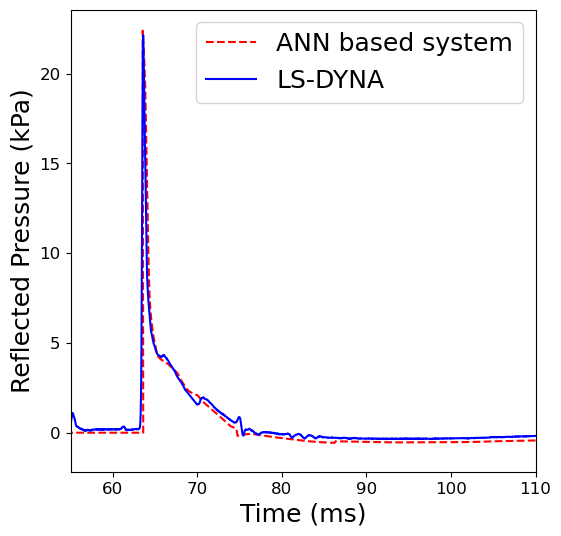

In [7]:
X1 = ml_model[:,0]
y1 = ml_model[:,1]


plt.figure(figsize=(6,6))
plt.plot(X1, y1, linestyle = 'dashed', color = 'red', label = 'ANN based system')
plt.plot(X2, y2, color = 'blue',label = 'LS-DYNA')
plt.ylabel('Reflected Pressure (kPa)',fontsize = 18)
plt.xlabel('Time (ms)',fontsize = 18)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 18)
plt.xlim (55, 110)
plt.savefig('RP_Num&ANN_Comparison/Section6_26.1m20.6kg/20deg3.png', dpi=150, bbox_inches='tight')
plt.show()